# Intro to Julia and Numerical Differentiations

## Forward difference

We would like to find the derivative of a function $f(x)$

$$
  f'(x) = \lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$
Hence,
$$
  f'(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$
or more formaly (using the asymptotic $O$ notation)
$$
  f'(x) + O(\Delta x) = \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$

$$
  error = \left|f'(x) - \frac{f(x+\Delta x) - f(x)}{\Delta x}\right| =  O(\Delta x)
$$

## Example of round-off error

In [1]:
Δx = 1e-90
x = 0

(exp(x + Δx) - exp(x)) / Δx

0.0

In [2]:
exp(0)

1.0

## Functions

In [3]:
function forward_diff(f::Function, x::Real, Δx::Real)
    return (f(x + Δx) - f(x)) / Δx
end

forward_diff (generic function with 1 method)

In [4]:
forward_diff(exp, 0, 1e-6)

1.0000004999621837

## Arrays

In [5]:
A = [1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [6]:
A = [1. 2 3]

1×3 Matrix{Float64}:
 1.0  2.0  3.0

In [7]:
x = range(1, 3, 3)

1.0:1.0:3.0

### Evaluating elementwise functions

### Ugly method

In [8]:
results = zeros(length(x))

for k = 1:length(x)
     results[k] = exp(x[k])
end

results

3-element Vector{Float64}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

### Bad method

In [9]:
results = [exp(z) for z = x]

3-element Vector{Float64}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

### Good method

In [10]:
exp.(x)

3-element Vector{Float64}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

## Plotting

In [11]:
using PyPlot

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


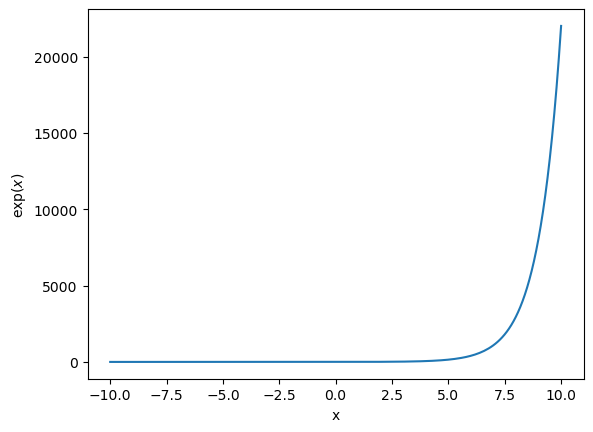

In [12]:
x  = range(-10, 10, 200)

plot(x, exp.(x))
xlabel("x")
ylabel(L"$\exp(x)$")
show()

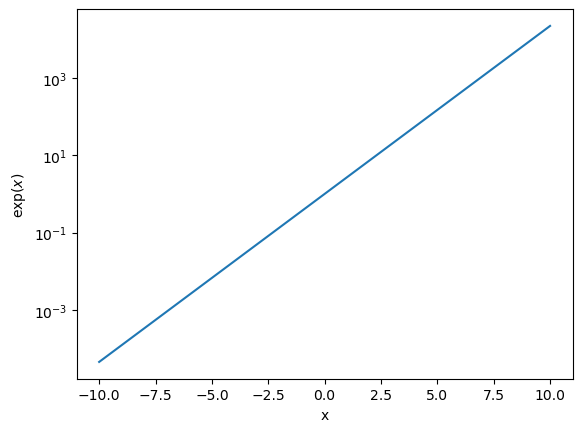

In [13]:
x  = range(-10, 10, 200)

semilogy(x, exp.(x))
xlabel("x")
ylabel(L"$\exp(x)$")
show()

## Error analysis of the forward finte difference

In [33]:
ΔX = 10 .^ range(-20, -1, 2000)

2000-element Vector{Float64}:
 1.0000000000000001e-20
 1.022126745416898e-20
 1.0447430836965402e-20
 1.0678598479355586e-20
 1.091488110931756e-20
 1.1156391904879139e-20
 1.1403246548329636e-20
 1.1655563281630647e-20
 1.1913462963053832e-20
 1.2177069125070968e-20
 1.2446508033525382e-20
 1.2721908748112573e-20
 1.3003403184199068e-20
 ⋮
 0.07860455689468451
 0.08034381991370136
 0.08212156716275297
 0.08393865017259998
 0.08579593931560721
 0.08769432422264738
 0.08963471420922885
 0.09161803871105295
 0.09364524772920799
 0.09571731228521461
 0.09783522488613933
 0.1

In [64]:
forward_diff_error = abs.(exp(10) .- forward_diff.(exp, 10, ΔX))

2000-element Vector{Float64}:
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
 22026.465794806718
     ⋮
   888.8255276945456
   909.0262163033767
   929.6982620783383
   950.853219657809
   972.5029520546232
   994.6596400009257
  1017.3357916276291
  1040.5442524882965
  1064.2982159422572
  1088.6112339122628
  1113.4972280337024
  1138.9705012099148

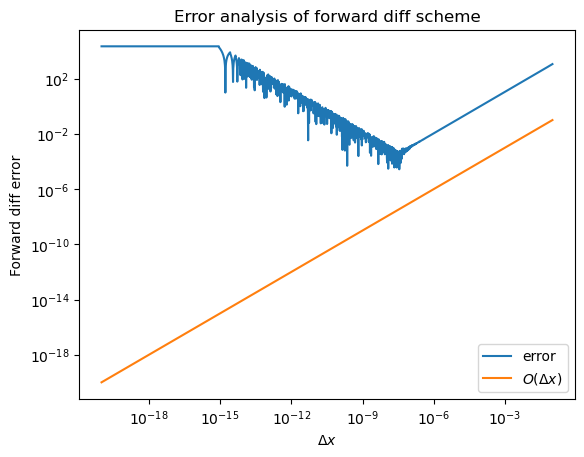

In [65]:
loglog(ΔX, forward_diff_error, label="error", "-")
loglog(ΔX, ΔX, label=L"O(\Delta x)")
xlabel(L"\Delta x")
ylabel("Forward diff error")
title("Error analysis of forward diff scheme")
legend()
show()

### Round off errors revisted

In [49]:
1. + 1e-16 == 1.

true

In [58]:
0.1 + 1e-18 == 0.1

true

In [63]:
0. + 1e-3000 == 0.

true

## Central finite difference

Using the Taylor expansion, we get
$$
    \frac{f(x + \Delta x/2) - f(x - \Delta x/2)}{\Delta x}=f'(x) + O(\Delta x^2)
$$
Hence,
$$
    error = \left| f'(x) - \frac{f(x + \Delta x/2) - f(x - \Delta x/2)}{\Delta x} \right| =  O(\Delta x^2).
$$